In [1]:
from __future__ import division

import PerformParser as pp
import pandas as pd
import numpy as np
from scipy import signal as sig
import performFun as pF

import bokeh.plotting as bkP
import bokeh.models as bkM
from bokeh.palettes import Spectral6
bkP.output_notebook() 

import cv2
import os
import scipy.io as sio
import matplotlib

%matplotlib notebook
from ipywidgets import interact
#import filterpy as fP
from bokeh.io import push_notebook

import Quaternion as qu
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
from scipy.fftpack import fft
from mpl_toolkits.mplot3d import Axes3D

bkP.output_notebook()

#bkP.output_file('timeSeries.html') 

#%pylab inline
#%matplotlib notebook


Loading BokehJS ...

Loading BokehJS ...

In [2]:
# List of subjects with good calibration quality
fileTimeList = ['2016-4-19-14-4', '2016-4-22-11-57', '2016-4-27-13-28', '2016-4-28-10-57', '2016-4-29-11-56',
                '2016-5-3-12-52', '2016-5-4-13-3', '2016-5-5-13-7', '2016-5-6-11-2', '2016-5-6-13-4']

fileTime = '2016-4-19-14-4'
#fileTime = '2016-4-22-11-57'
#fileTime = '2016-4-27-13-28' # Moderate Gaze Errors
#fileTime = '2016-4-28-10-57' # Moderate Gaze Errors
#fileTime = '2016-4-29-11-56' # Good Gaze Errors
#fileTime = '2016-5-3-12-52' # Very clean data Low gaze errors
#fileTime = '2016-5-4-13-3' # Good Gaze Errors
#fileTime = '2016-5-5-13-7'
#fileTime = '2016-5-6-11-2' # High Gaze Errors
#fileTime = '2016-5-6-13-4' # Good Gaze Errors

expCfgName = "gd_pilot.cfg"
sysCfgName = "PERFORMVR.cfg"

filePath = "../Data/" + fileTime + "/"
fileName = "exp_data-" + fileTime

sessionDict = pF.loadSessionDict(filePath,fileName,expCfgName,sysCfgName,startFresh=False)

rawDataFrame = sessionDict['raw']
processedDataFrame = sessionDict['processed']
calibDataFrame = sessionDict['calibration']
trialInfoDataFrame = sessionDict['trialInfo']

## Read All Subject Pickle File

In [ ]:
#print ('Reading the All Subject Pickle File')
#df = pd.read_pickle('../Data/AllSubjects_2.pickle')
#rawDataFrame = df['raw']
#processedDataFrame = df['processed']
#calibDataFrame = df['calibration']
#trialInfoDataFrame = df['trialInfo']

Reading the All Subject Pickle File


# Here we want to show the effect of free rotation/movement of subjects body on the Time To Contact (TTC)
### - We calculate the average and std of flight time for all subjects for each condition
### - The lower the std the more consistent the TTC for each condition
### - Result: Although that subjects were able to rotate and catch the ball earlier than the intended time, this has made a very small negligible difference on TTC

In [3]:
#list(trialInfoDataFrame.columns)
#np.unique(rawDataFrame.trialType.values[rawDataFrame.trialNumber.values == 0])
#trialInfoDataFrame[trialInfoDataFrame.preBlankDur == 0.8 and trialInfoDataFrame.postBlankDur == 0.5]
gb = trialInfoDataFrame.groupby([trialInfoDataFrame.preBlankDur, trialInfoDataFrame.postBlankDur])
slicedDF = gb.get_group((0.6,0.3))
print(np.mean(slicedDF.ballCrossingIndex.values - slicedDF.trialStartIdx))
print(np.std(slicedDF.ballCrossingIndex.values - slicedDF.trialStartIdx))
print(np.mean(slicedDF.ballCrossingIndex.values - slicedDF.trialStartIdx)/75)
#print(slicedDF.ballCrossingIndex.values - slicedDF.trialStartIdx)


101.4
0.879393730551528
1.352


<IPython.core.display.Javascript object>


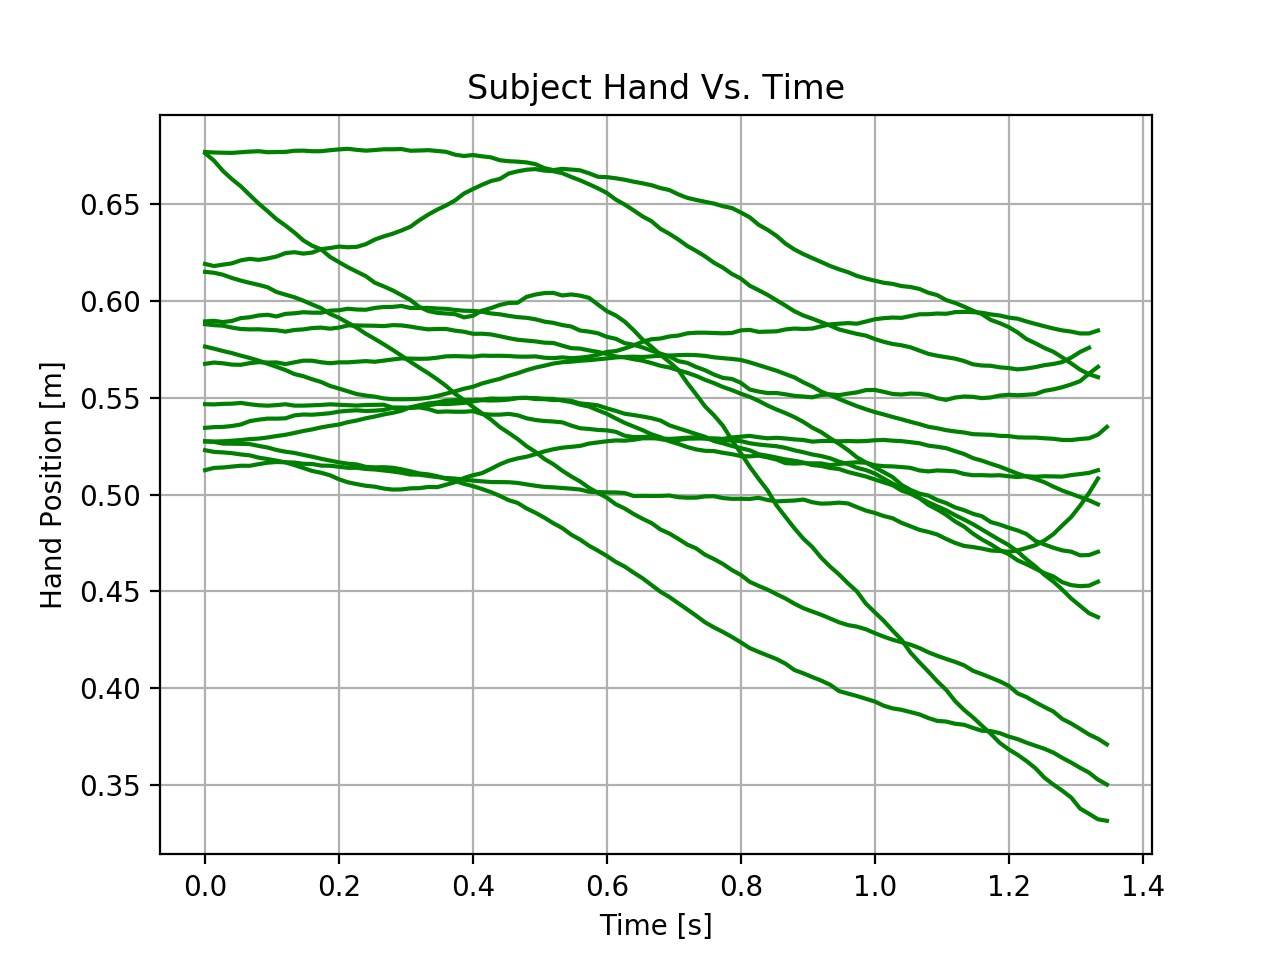

101


In [6]:
plt.figure()
gb = trialInfoDataFrame.groupby([trialInfoDataFrame.preBlankDur, trialInfoDataFrame.postBlankDur])
slicedDF = gb.get_group((0.6,0.3))
crIndex = slicedDF.ballCrossingIndex.values
stIndex = slicedDF.trialStartIdx
averageTTC = int(np.mean(slicedDF.ballCrossingIndex.values - slicedDF.trialStartIdx))
print('Average TTC = ',averageTTC/75.0)
np.array()
for cnt in range(len(slicedDF)):
    i = slicedDF.trialStartIdx.values[cnt]
    j = slicedDF.ballCrossingIndex.values[cnt]
    x = np.arange(j-i)/75.
    y = rawDataFrame.paddlePos.X.values[i:j]
    #plt.plot(x, y, 'b', label='Hand X')
    y = rawDataFrame.paddlePos.Y.values[i:j]
    #plt.plot(x, y, 'r', label='Hand Y')
    y = rawDataFrame.paddlePos.Z.values[i:j]
    plt.plot(x, y, 'g', label='Hand Z')
plt.grid(True)
#plt.legend()
plt.title("Subject Hand Vs. Time")
plt.xlabel('Time [s]')
plt.ylabel('Hand Position [m]')
plt.savefig('HandPosition.png')
plt.show()    

In [13]:
#list(rawDataFrame.columns)
trialNumber = 0
for i in range(len(trialInfoDataFrame))
trialType = 't1'
paddlePos = rawDataFrame.paddlePos[rawDataFrame.trialType.values == trialType]
paddlePos

X        Y         Z
frameNum                             
2700     -0.852481   1.5852  0.567591
2701     -0.851853  1.58526   0.56827
2702     -0.850916  1.58601  0.567866
2703     -0.850666  1.58582  0.567197
2704     -0.849734  1.58614  0.567096
2705     -0.849957  1.58481  0.567951
2706     -0.849231  1.58502  0.568444
2707      -0.84731  1.58668  0.568248
2708     -0.846736  1.58674  0.568327
2709     -0.845253   1.5873  0.567461
2710     -0.845103  1.58632  0.568366
2711     -0.844264  1.58607  0.569235
2712     -0.842911  1.58675  0.569203
2713     -0.841132  1.58759  0.568422
2714     -0.839191   1.5883  0.567908
2715     -0.838028  1.58785  0.568374
2716     -0.836233  1.58834  0.568361
2717     -0.832997  1.59008  0.568707
2718     -0.831926  1.58995  0.568999
2719     -0.830188  1.59039  0.568662
2720     -0.828955  1.58956  0.569264
2721     -0.827213  1.58957  0.569865
2722     -0.825533  1.58971    0.5704
2723     -0.822649  1.59103  0.570299
2724     -0.821336    1.591  0.570201
2725     -0.819691  1.59051  0.570285
2726     -0.817919   1.5906  0.570787
2727     -0.816289  1.59057  0.571475
2728     -0.813298  1.59203  0.571577
2729     -0.811964  1.59195  0.571453
...            ...      ...       ...
39479    -0.846762  1.51492  0.702904
39480    -0.848465  1.51552  0.701931
39481    -0.849274  1.51557  0.701887
39482    -0.850805  1.51588  0.701278
39483    -0.852775  1.51762  0.698566
39484    -0.854363  1.51788  0.697527
39485    -0.855384  1.51845  0.696483
39486    -0.856119  1.51877  0.695623
39487    -0.856212   1.5181  0.695987
39488    -0.857436  1.51851  0.694646
39489    -0.858508  1.51799  0.694462
39490    -0.859165  1.51744  0.694998
39491    -0.859095  1.51571  0.696989
39492    -0.858627  1.51476  0.697645
39493    -0.858995  1.51344  0.698696
39494    -0.858542  1.51153   0.70092
39495    -0.858115  1.50904  0.703405
39496    -0.857012   1.5062  0.706186
39497    -0.854842  1.50191  0.710855
39498    -0.854344  1.49859  0.714222
39499     -0.85315  1.49476  0.718354
39500    -0.852324  1.49048  0.722282
39501    -0.849636  1.48459  0.728691
39502     -0.84774  1.48076  0.732066
39503    -0.845639  1.47538  0.736491
39504    -0.843817  1.47019    0.7403
39505    -0.842334  1.46502   0.74395
39506    -0.838791  1.45763  0.749777
39507    -0.836588  1.45284  0.753147
39508    -0.833821  1.44783   0.75585

[4502 rows x 3 columns]